In [1]:
import tensorflow.keras as K
import tensorflow as tf
def preprocess_data(X, Y):
    X_p = K.applications.resnet.preprocess_input(X)
    Y_p = K.utils.to_categorical(Y, 10)
    return X_p, Y_p

In [3]:
CALLBACKS = []
MODEL_PATH = 'cifar10.h5'
optimizer = K.optimizers.Adam()
(x_train, y_train), (x_test, y_test) = K.datasets.cifar10.load_data()
x_train, y_train = preprocess_data(x_train, y_train)
x_test, y_test = preprocess_data(x_test, y_test)
inputs = K.Input(shape=(32, 32, 3))
upscale = K.layers.Lambda(lambda x: tf.image.resize_with_pad(x,160,160,method=tf.image.ResizeMethod.BILINEAR))(inputs)
base_model = K.applications.ResNet50(include_top=False,
                                        weights='imagenet',
                                        input_tensor=upscale,
                                        input_shape=(160,160,3),
                                        pooling='max')

out = base_model.output
out = K.layers.Flatten()(out)
out = K.layers.Dense(10, activation='softmax')(out)
CALLBACKS.append(K.callbacks.ModelCheckpoint(filepath=MODEL_PATH,
                                              monitor='val_acc',
                                              save_best_only=True))

CALLBACKS.append(K.callbacks.EarlyStopping(monitor='val_acc',
                                            verbose=1,
                                            patience=5))

CALLBACKS.append(K.callbacks.TensorBoard(log_dir='logs'))

model = K.models.Model(inputs=inputs, outputs=out)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(x=x_train,
          y=y_train,
          batch_size=128,
          epochs=20,
          callbacks=CALLBACKS,
          validation_data=(x_test, y_test))

94781440/94765736 [==============================] - 1s 0us/step
Epoch 1/20
391/391 [==============================] - 165s 374ms/step - loss: 1.2580 - accuracy: 0.7201 - val_loss: 14.0628 - val_accuracy: 0.5054
Epoch 2/20
391/391 [==============================] - 146s 372ms/step - loss: 0.4812 - accuracy: 0.8459 - val_loss: 4.1291 - val_accuracy: 0.6167
Epoch 3/20
391/391 [==============================] - 146s 373ms/step - loss: 0.4836 - accuracy: 0.8587 - val_loss: 2370.0867 - val_accuracy: 0.1033
Epoch 4/20
391/391 [==============================] - 145s 372ms/step - loss: 0.5298 - accuracy: 0.8439 - val_loss: 0.5655 - val_accuracy: 0.8219
Epoch 5/20
391/391 [==============================] - 145s 372ms/step - loss: 0.3177 - accuracy: 0.8955 - val_loss: 0.4747 - val_accuracy: 0.8442
Epoch 6/20
391/391 [==============================] - 143s 366ms/step - loss: 0.2938 - accuracy: 0.9072 - val_loss: 0.4423 - val_accuracy: 0.8580
Epoch 7/20
391/391 [==============================] - 1

In [ ]:
import numpy as np
def plot_confusion_matrix(cm, classes, normalize, title):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.binary)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    title_font = {'family': 'serif', 'color': 'black', 'weight': 'bold', 'size': 15}
    label_font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 10}
    plt.title(title, fontdict=title_font)
    plt.ylabel('True label',fontdict=label_font)
    plt.xlabel('Predicted label',fontdict=label_font)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()

In [ ]:
from sklearn.metrics import confusion_matrix  
#### To analyze results, plot the confusion matrix using the following command
#Predict the test results
predict_x=model.predict(x_test) 
y_predict=np.argmax(predict_x,axis=1)
y_test_labels = y_test.argmax(1)
#confusion matrix and classification report
print("Confusion Matrix\n",confusion_matrix(y_test_labels,y_predict))

Confusion Matrix
 [[898   7  48   5   7   0   1   7  23   4]
 [ 15 936   2   6   1   2   1   2   9  26]
 [ 37   1 841  28  45  25   8   7   7   1]
 [ 25   1  56 689  60 115  22  24   5   3]
 [  4   1  30  17 925   7   6   9   0   1]
 [ 14   0  31  66  45 813   6  22   1   2]
 [ 10   3  42  55  33  11 840   3   0   3]
 [ 18   3  11  20  28  19   0 900   0   1]
 [ 57  10   9   9   5   3   0   0 898   9]
 [ 34  52   7   8   2   1   2   6  17 871]]


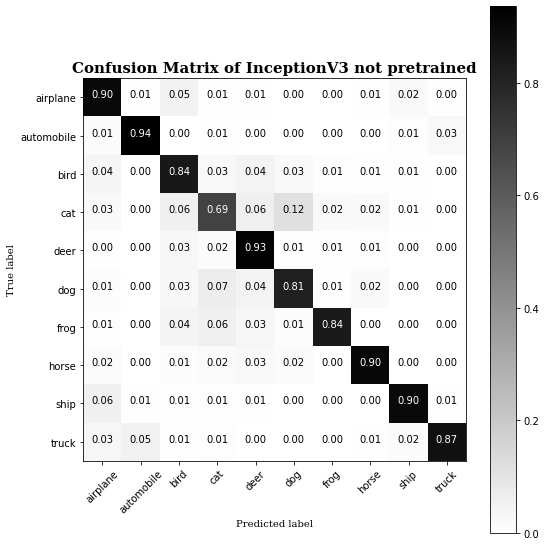

In [ ]:
# Compute confusion matrix
import matplotlib.pyplot as plt
import itertools   
cnf_matrix = confusion_matrix(y_test_labels,y_predict)
np.set_printoptions(precision=2)
label_names = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]
# Plot normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=label_names, normalize=True, 
                      title='Confusion Matrix of ResNet50')

In [ ]:
model.evaluate(x_test, y_test, batch_size=128, verbose=1)

79/79 [==============================] - 16s 203ms/step - loss: 0.5449 - accuracy: 0.8611


[0.5449468493461609, 0.8611000180244446]

In [ ]:
from sklearn.metrics import confusion_matrix
predicted_val = model.predict(x_test)
predicted_val = np.argmax(predicted_val, axis=1)
true_val = np.argmax(y_test, axis=1)
confusion_matrix = confusion_matrix(true_val, predicted_val)

In [ ]:
errors = (predicted_val - true_val !=0)
total_errors = sum(errors)
print(total_errors)
errors_index = np.where(errors==True)
true_value_labels = true_val[errors_index]
pred_value_labels = predicted_val[errors_index]
X_val_errors = x_test[errors_index]

1389


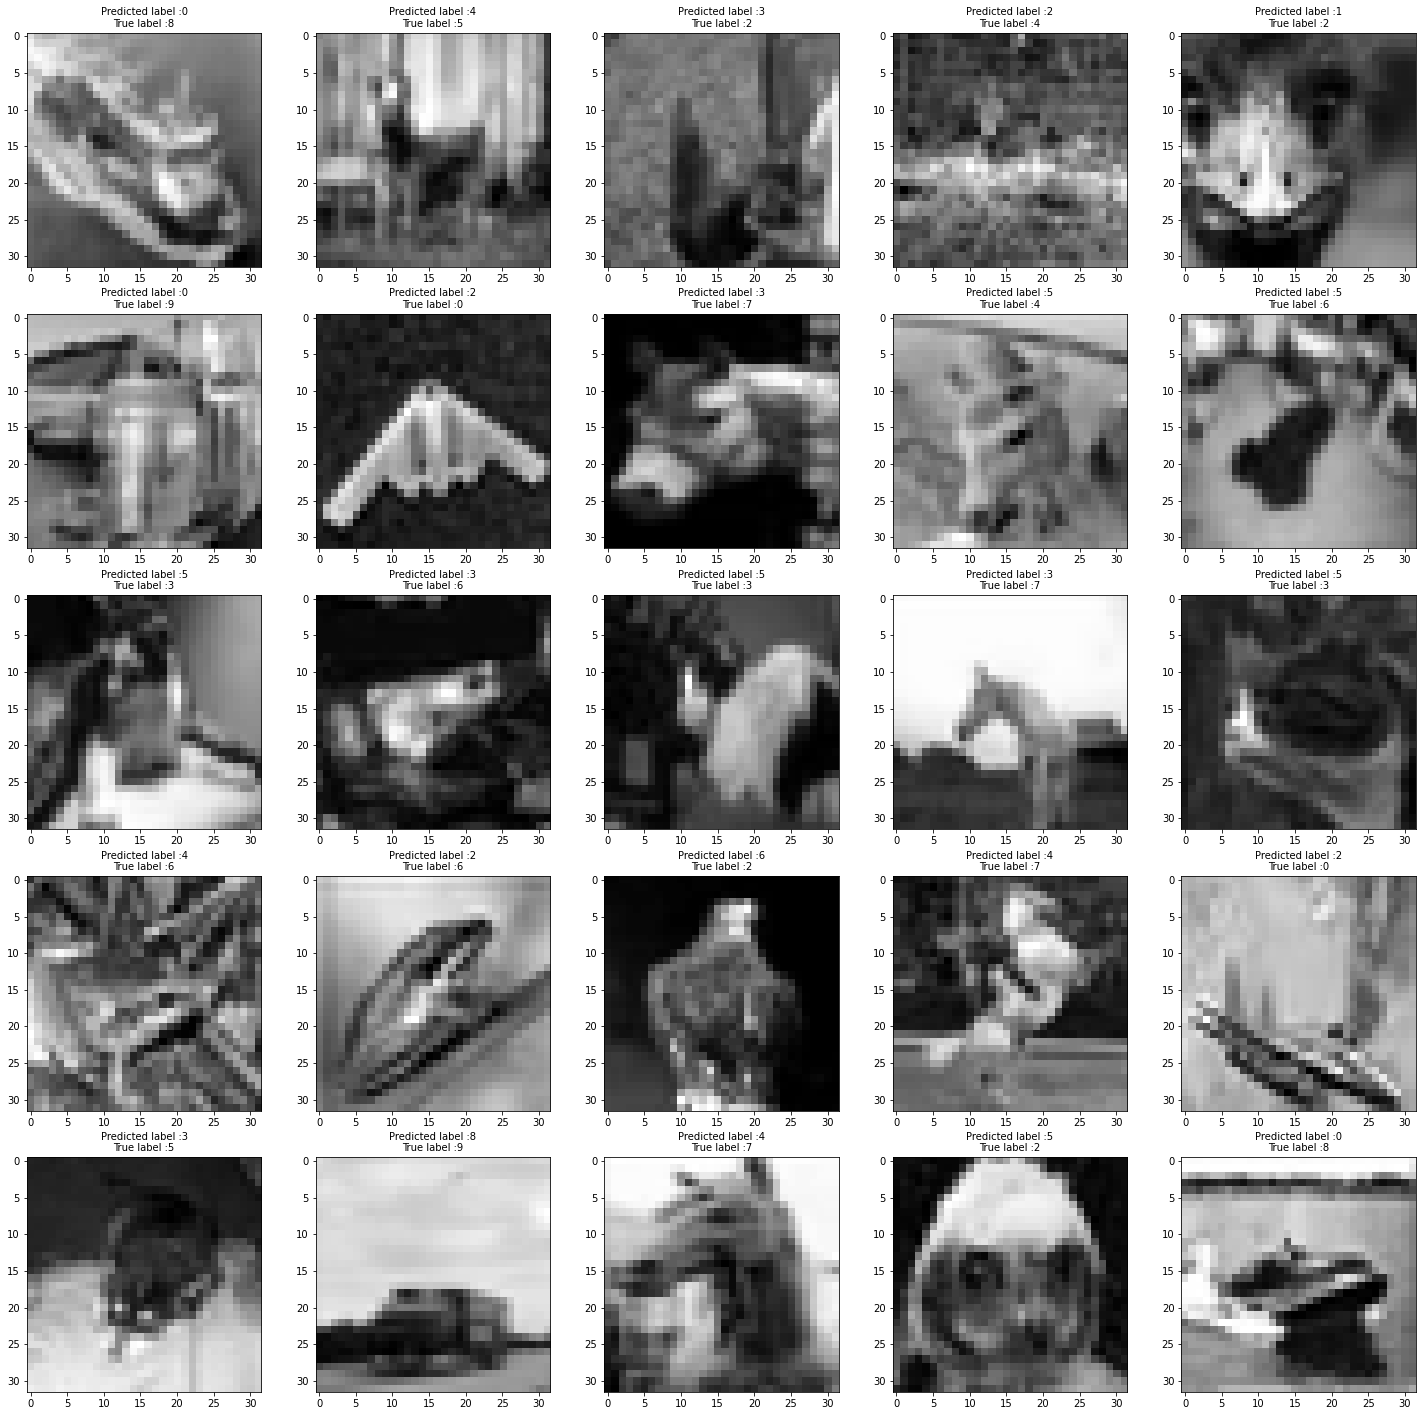

In [ ]:
index = 0
n_rows = 5
n_cols = 5

fig, axis = plt.subplots(n_rows,n_cols,figsize=[25,25])

for row in range(n_rows):
    for col in range(n_cols):
        if index < total_errors:
            axis[row,col].imshow(X_val_errors[index,:,:,0],plt.get_cmap('gray'))
            axis[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_value_labels[index],true_value_labels[index]),fontsize=10)
            index += 1

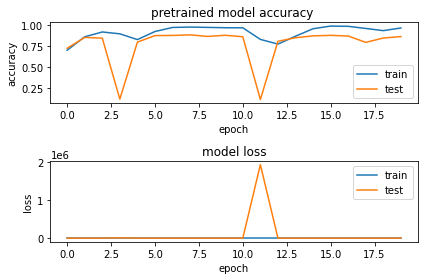

In [ ]:
import os
from math import log
import matplotlib.pyplot as plt
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('pretrained model accuracy ')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()